In [40]:
%matplotlib inline

from spacepy import pycdf
import numpy as np
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection 
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.cm as pltcm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cPickle as pickle


In [41]:
fdL = open("./fdLA.pickle", "r")
fdK = open("./fdKA.pickle", "r")
fdB = open("./fdBA.pickle", "r")
fEpochA = open("./fEpochA.pickle", "r")
fCoordSMA = open("./fCoordSMA.pickle", "r")

fdL2 = open("./fdLB.pickle", "r")
fdK2 = open("./fdKB.pickle", "r")
fdB2 = open("./fdBB.pickle", "r")
fEpochB = open("./fEpochB.pickle", "r")
fCoordSMB = open("./fCoordSMB.pickle", "r")


In [42]:
pathout="/Volumes/8TB Seagate/PhD Data/profiles/"

In [43]:
dLA = pickle.load(fdL)
dLA = np.array(dLA)

dLB = pickle.load(fdL2)
dLB = np.array(dLB)

dKA = pickle.load(fdK)
dKA = np.array(dKA)

dKB = pickle.load(fdK2)
dKB = np.array(dKB)

dEpA = pickle.load(fEpochA)
dEpA = np.array(dEpA)

dEpB = pickle.load(fEpochB)
dEpB = np.array(dEpB)

dPtA = pickle.load(fCoordSMA)
dPtA = np.array(dPtA)

dPtB = pickle.load(fCoordSMB)
dPtB = np.array(dPtB)

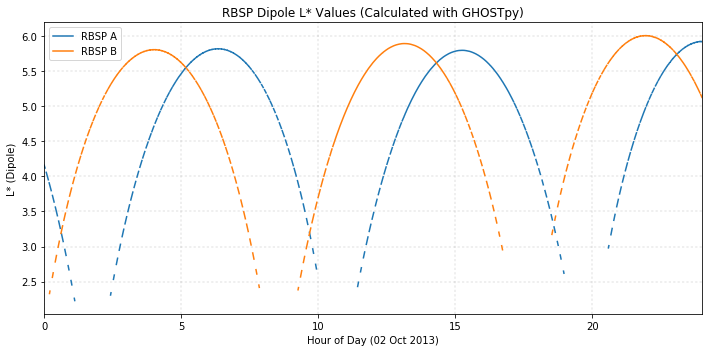

In [44]:
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)

deltaD = dEpA - min(dEpA)
jd = [d.total_seconds() for d in deltaD]
xA = np.array(jd)/60.0/60.0

deltaD = dEpB - min(dEpB)
jd = [d.total_seconds() for d in deltaD]
xB = np.asarray(jd)/60.0/60.0

yA_NoNaN = ~np.isnan(dLA)
yB_NoNaN = ~np.isnan(dLB)

yA = dLA #[np.where(yA_NoNaN)]
yB = dLB #[np.where(yB_NoNaN)]
xA = xA  #[np.where(yA_NoNaN)]
xB = xB  #[np.where(yB_NoNaN)]
ax.plot(xA, yA, label="RBSP A")
ax.plot(xB, yB, label="RBSP B")
plt.grid(b=True, which='major', color='grey', linewidth=0.25, linestyle=':')


ax.set_title("RBSP Dipole L* Values (Calculated with GHOSTpy)")
ax.set_ylabel("L* (Dipole)")
ax.set_xlabel("Hour of Day (02 Oct 2013)")

plt.xlim(np.min(xA), np.max(xA))


plt.legend()
fig.tight_layout()
fig.savefig(pathout+"RBSP_DIPOLE_Lstar.pdf")

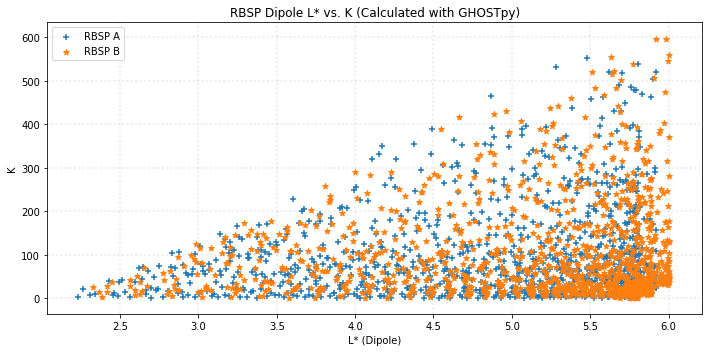

In [45]:
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)

yA = dKA
yB = dKB

xA = dLA
xB = dLB

ax.scatter(xA, yA, marker="+", label="RBSP A")
ax.scatter(xB, yB, marker="*", label="RBSP B")
plt.grid(b=True, which='major', color='grey', linewidth=0.25, linestyle=':')


ax.set_title("RBSP Dipole L* vs. K (Calculated with GHOSTpy)")
ax.set_xlabel("L* (Dipole)")
ax.set_ylabel("K")
fig.tight_layout()
plt.legend()
fig.savefig(pathout+"RBSP_DIPOLE_LvK.pdf")

In [46]:
RBSPA_dat = pickle.load(open("./RBSP_LFM/RBSPA_LFM_LKB.pickle", "rb"))
RBSPB_dat = pickle.load(open("./RBSP_LFM/RBSPB_LFM_LKB.pickle", "rb"))
RBSPA_RCM_dat = pickle.load(open("./RBSP_LFM/RBSPA_RCM_LKB.pickle", "rb"))
RBSPB_RCM_dat = pickle.load(open("./RBSP_LFM/RBSPB_RCM_LKB.pickle", "rb"))


In [47]:
RBaL4 = {}
RBaL = {}
RBaK = {}
RBbL4 = {}
RBbL = {}
RBbK = {}
for rank in RBSPA_dat:
    for key in rank:
        K = rank[key][2]
        if K is None:
            K = np.NaN

        RBaL4[key] = rank[key][0]
        RBaL[key] = rank[key][1]
        RBaK[key] = K
        
for rank in RBSPB_dat:
    for key in rank:
        K = rank[key][2]
        if K is None:
            K = np.NaN
        RBbL4[key] = rank[key][0]
        RBbL[key] = rank[key][1]
        RBbK[key] = K
        


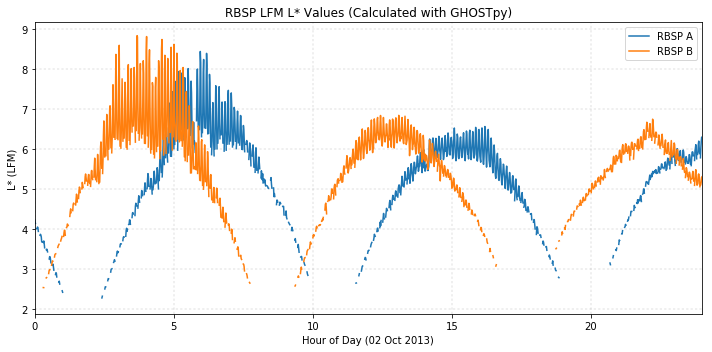

In [48]:



Xa = []
Ya = []
lkeys = sorted(RBaL.keys())

for key in lkeys:
    Xa.append(key)
    Ya.append(RBaL[key])
    
Xb = []
Yb = []
lkeys = sorted(RBbL.keys())

for key in lkeys:
    Xb.append(key)
    Yb.append(RBbL[key])
    
Xb = np.array(Xb)
Yb = np.array(Yb)
Xa = np.array(Xa)
Ya = np.array(Ya)
    
deltaD = Xa - min(Xa)
jd = [d.total_seconds() for d in deltaD]
xA = np.array(jd)/60.0/60.0

deltaD = Xb - min(Xb)
jd = [d.total_seconds() for d in deltaD]
xB = np.asarray(jd)/60.0/60.0

figL = plt.figure(figsize=[10,5])
axL = figL.add_subplot(111)
axL.plot(xA, Ya, label="RBSP A", lw=1.5)
axL.plot(xB, Yb, label="RBSP B", lw=1.5)
axL.set_title("RBSP LFM L* Values (Calculated with GHOSTpy)")
axL.set_ylabel("L* (LFM)")
axL.set_xlabel("Hour of Day (02 Oct 2013)")

figL.tight_layout()
plt.grid(b=True, which='major', color='grey', linewidth=0.25, linestyle=':')
plt.legend()
plt.xlim(np.min(xA), np.max(xA))



figL.savefig(pathout+"RBSP_LFM_Lstar.pdf")

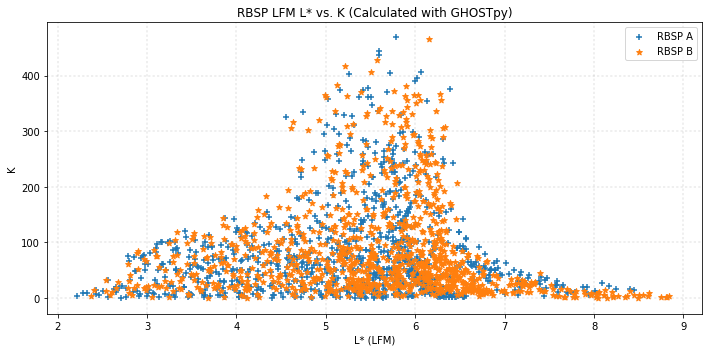

In [49]:
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)

Xa = []
Ya = []
lkeys = sorted(RBaL.keys())

for key in lkeys:
    Ya.append(RBaK[key])
    Xa.append(RBaL[key])
    
Xb = []
Yb = []
lkeys = sorted(RBbL.keys())

for key in lkeys:
    Yb.append(RBbK[key])
    Xb.append(RBbL[key])


yA = Ya
yB = Yb

xA = Xa
xB = Xb

ax.scatter(xA, yA, marker="+", label="RBSP A")
ax.scatter(xB, yB, marker="*", label="RBSP B")
plt.grid(b=True, which='major', color='grey', linewidth=0.25, linestyle=':')


ax.set_title("RBSP LFM L* vs. K (Calculated with GHOSTpy)")
ax.set_xlabel("L* (LFM)")
ax.set_ylabel("K")
fig.tight_layout()
plt.legend()
fig.savefig(pathout+"RBSP_LFM_LvK.pdf")

In [50]:
RBaL4 = {}
RBaL = {}
RBaK = {}
RBbL4 = {}
RBbL = {}
RBbK = {}
for rank in RBSPA_RCM_dat:
    for key in rank:
        K = rank[key][2]
        if K is None:
            K = np.NaN

        RBaL4[key] = rank[key][0]
        RBaL[key] = rank[key][1]
        RBaK[key] = K
        
for rank in RBSPB_RCM_dat:
    for key in rank:
        K = rank[key][2]
        if K is None:
            K = np.NaN
        RBbL4[key] = rank[key][0]
        RBbL[key] = rank[key][1]
        RBbK[key] = K
        


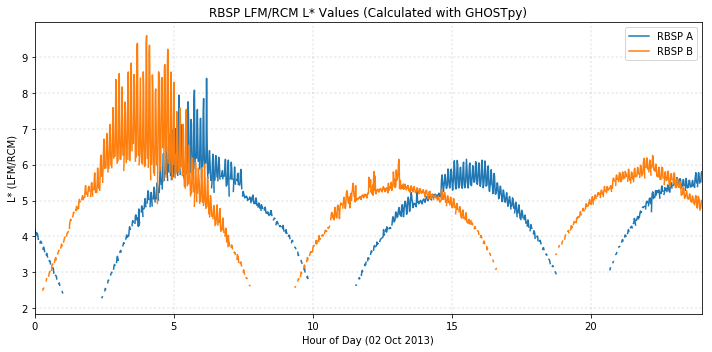

In [51]:



Xa = []
Ya = []
lkeys = sorted(RBaL.keys())

for key in lkeys:
    Xa.append(key)
    Ya.append(RBaL[key])
    
Xb = []
Yb = []
lkeys = sorted(RBbL.keys())

for key in lkeys:
    Xb.append(key)
    Yb.append(RBbL[key])
    
Xb = np.array(Xb)
Yb = np.array(Yb)
Xa = np.array(Xa)
Ya = np.array(Ya)
    
deltaD = Xa - min(Xa)
jd = [d.total_seconds() for d in deltaD]
xA = np.array(jd)/60.0/60.0

deltaD = Xb - min(Xb)
jd = [d.total_seconds() for d in deltaD]
xB = np.asarray(jd)/60.0/60.0

figL = plt.figure(figsize=[10,5])
axL = figL.add_subplot(111)
axL.plot(xA, Ya, label="RBSP A", lw=1.5)
axL.plot(xB, Yb, label="RBSP B", lw=1.5)
axL.set_title("RBSP LFM/RCM L* Values (Calculated with GHOSTpy)")
axL.set_ylabel("L* (LFM/RCM)")
axL.set_xlabel("Hour of Day (02 Oct 2013)")

figL.tight_layout()
plt.grid(b=True, which='major', color='grey', linewidth=0.25, linestyle=':')
plt.legend()
plt.xlim(np.min(xA), np.max(xA))



figL.savefig(pathout+"RBSP_RCM_Lstar.pdf")

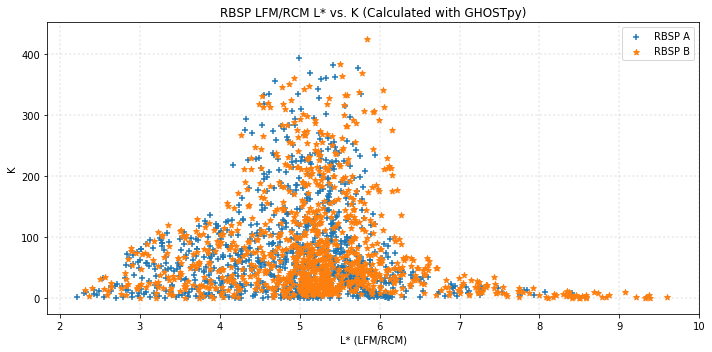

In [52]:
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)

Xa = []
Ya = []
lkeys = sorted(RBaL.keys())

for key in lkeys:
    Ya.append(RBaK[key])
    Xa.append(RBaL[key])
    
Xb = []
Yb = []
lkeys = sorted(RBbL.keys())

for key in lkeys:
    Yb.append(RBbK[key])
    Xb.append(RBbL[key])


yA = Ya
yB = Yb

xA = Xa
xB = Xb

ax.scatter(xA, yA, marker="+", label="RBSP A")
ax.scatter(xB, yB, marker="*", label="RBSP B")
plt.grid(b=True, which='major', color='grey', linewidth=0.25, linestyle=':')


ax.set_title("RBSP LFM/RCM L* vs. K (Calculated with GHOSTpy)")
ax.set_xlabel("L* (LFM/RCM)")
ax.set_ylabel("K")
fig.tight_layout()
plt.legend()
fig.savefig(pathout+"RBSP_RCM_LvK.pdf")